In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import *

Version:  0.0.25


In [4]:
ls ../data/digits/

0/     1/     2/     3/     4/     5/     6/     7/     8/     9/     Icon?


In [5]:
images=image.load_images('../data/digits')

[9]: 180 files found
[0]: 178 files found
[7]: 179 files found
[6]: 181 files found
[1]: 182 files found
[8]: 174 files found
[4]: 181 files found
[3]: 183 files found
[2]: 177 files found
[5]: 182 files found


In [6]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '9', '0', '7', '6', '1', '8', '4', '3', '2', '5'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.10378408e+01 1.19312187e+02 1.

In [7]:
data.vectors/=255

In [9]:
summary(data)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '9', '0', '7', '6', '1', '8', '4', '3', '2', '5'
Mean:  [0.00000000e+00 1.84839657e-02 3.23591607e-01 7.38828330e-01
 7.39568126e-01 3.59937587e-01 8.45417744e-02 8.03081388e-03
 3.33889816e-04 1.23495586e-01 6.47855358e-01 7.47753882e-01
 6.41192838e-01 5.09895578e-01 1.14524207e-01 6.66688490e-03
 1.65853765e-04 1.61249141e-01 6.17944941e-01 4.35610549e-01
 4.42410554e-01 4.86953201e-01 1.10827414e-01 3.07047694e-03
 6.54685914e-05 1.52945541e-01 5.67224241e-01 5.50143485e-01
 6.19638395e-01 4.70677709e-01 1.43878141e-01 1.30937183e-04
 0.00000000e+00 1.45130774e-01 4.78152040e-01 5.66067629e-01
 6.43054328e-01 5.45418835e-01 1.80479448e-01 0.00000000e+00
 5.39024736e-04 9.79846585e-02 4.29257914e-01 4.50827632e-01
 4.78407367e-01 5.13627287e-01 2.14808995e-01 1.66290222e-03
 4.45186422e-04 4.32856504e-02 4.67890929e-01 5.

In [10]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (1797, 64)
Train vector shape:  (1437, 64)
Test vector shape:  (360, 64)


In [13]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 85.73416840640222
On Test Set: 86.11111111111111


In [15]:
C.means.shape

(10, 64)

In [16]:
data.target_names

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [17]:
prototypes=C.means

In [18]:
pr1=prototypes[0,:]

In [19]:
pr1.shape

(64,)

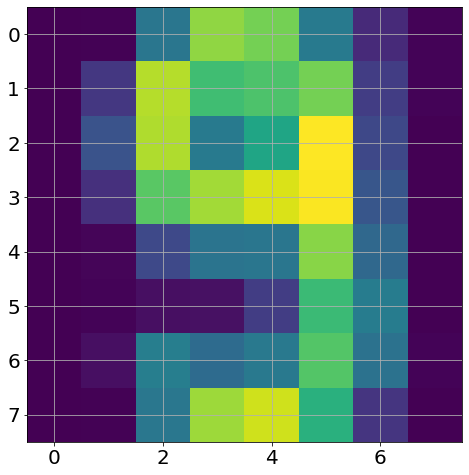

In [20]:
pr1=pr1.reshape(8,8)
imshow(pr1)

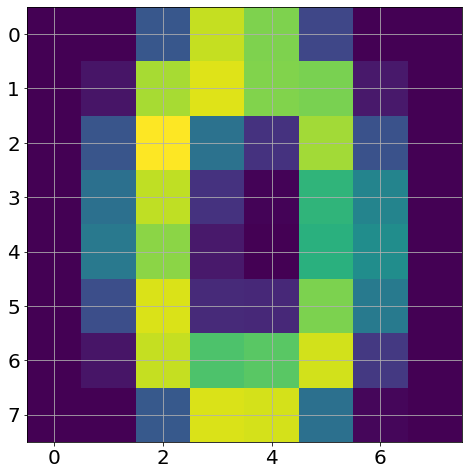

In [21]:
pr2=prototypes[1,:].reshape(8,8)
imshow(pr2)

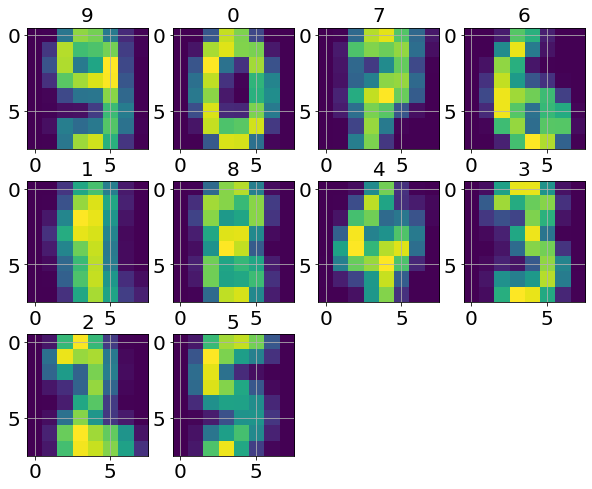

In [23]:
for i,name in enumerate(data.target_names):
    pr=prototypes[i,:].reshape(8,8)
    subplot(3,4,i+1)
    imshow(pr)
    title(name)

In [24]:
test_vector=rand(64)

In [26]:
C.predict(test_vector.reshape(1,64))

array([8], dtype=int32)

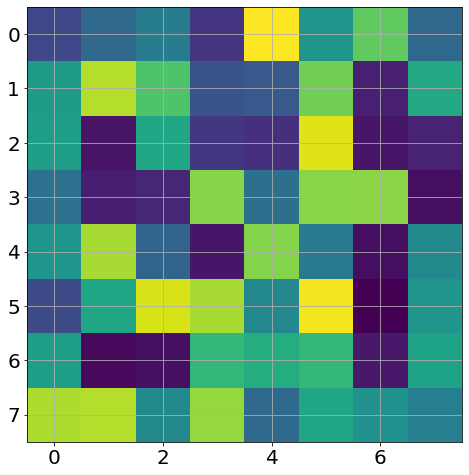

In [27]:
imshow(test_vector.reshape(8,8))

In [28]:
C=kNearestNeighbor()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 99.09533750869868
On Test Set: 98.33333333333333


In [29]:
C.predict(test_vector.reshape(1,64))

array([5], dtype=int32)